In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle
from src.report2 import guardar_resultados_en_ipynb

data = pd.read_csv('../data/processed_data/credit_card_default.csv')

data.drop('ID', axis=1, inplace=True)

X = data.drop('default payment next month', axis=1)
y = data['default payment next month']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_lr = LogisticRegression()
model_lr.fit(X_train_scaled, y_train)

y_pred = model_lr.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Calcular las métricas
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Imprimir los resultados
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

guardar_resultados_en_ipynb(accuracy, conf_matrix, classification_rep, '../reports/', 'Logistic Regression.ipynb')


with open('../models/trained_model_logistic_regresion.pkl', 'wb') as file:
    pickle.dump(model, file)


Accuracy: 0.8079946103750281
Confusion Matrix:
[[6758  177]
 [1533  438]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      6935
           1       0.71      0.22      0.34      1971

    accuracy                           0.81      8906
   macro avg       0.76      0.60      0.61      8906
weighted avg       0.79      0.81      0.77      8906



In [18]:
from sklearn.ensemble import RandomForestClassifier

# Crear y entrenar el modelo de Random Forest
model_rf = RandomForestClassifier()
model_rf.fit(X_train_scaled, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_rf = model_rf.predict(X_test_scaled)

# Calcular las métricas y resultados
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

# Imprimir las métricas y resultados
print("Random Forest Model")
print("Accuracy:", accuracy_rf)
print("Confusion Matrix:")
print(conf_matrix_rf)
print("Classification Report:")
print(classification_rep_rf)

guardar_resultados_en_ipynb(accuracy_rf, conf_matrix_rf, classification_rep_rf, '../reports/', 'Random_Forest_Classifier.ipynb')

# Guardar el modelo entrenado
with open('../models/trained_model_random_forest.pkl', 'wb') as file:
    pickle.dump(model_rf, file)


Random Forest Model
Accuracy: 0.8118122613968112
Confusion Matrix:
[[6543  392]
 [1284  687]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      6935
           1       0.64      0.35      0.45      1971

    accuracy                           0.81      8906
   macro avg       0.74      0.65      0.67      8906
weighted avg       0.79      0.81      0.79      8906



In [19]:
import xgboost as xgb

# Crear y entrenar el modelo de XGBoost
model_xgb = xgb.XGBClassifier()
model_xgb.fit(X_train_scaled, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model_xgb.predict(X_test_scaled)

# Evaluar el rendimiento del modelo
accuracy_xgb = accuracy_score(y_test, y_pred)
conf_matrix_xgb = confusion_matrix(y_test, y_pred)
classification_rep_xgb = classification_report(y_test, y_pred)

# Imprimir los resultados
print("Accuracy:", accuracy_xgb)
print("Confusion Matrix:")
print(conf_matrix_xgb)
print("Classification Report:")
print(classification_rep_xgb)

guardar_resultados_en_ipynb(accuracy_xgb, conf_matrix_xgb, classification_rep_xgb, '../reports/', 'XGB_Classifier.ipynb')

# Guardar el modelo entrenado
with open('../models/trained_model_XGB.pkl', 'wb') as file:
    pickle.dump(model_rf, file)

Accuracy: 0.8110262744217381
Confusion Matrix:
[[6539  396]
 [1287  684]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      6935
           1       0.63      0.35      0.45      1971

    accuracy                           0.81      8906
   macro avg       0.73      0.64      0.67      8906
weighted avg       0.79      0.81      0.79      8906



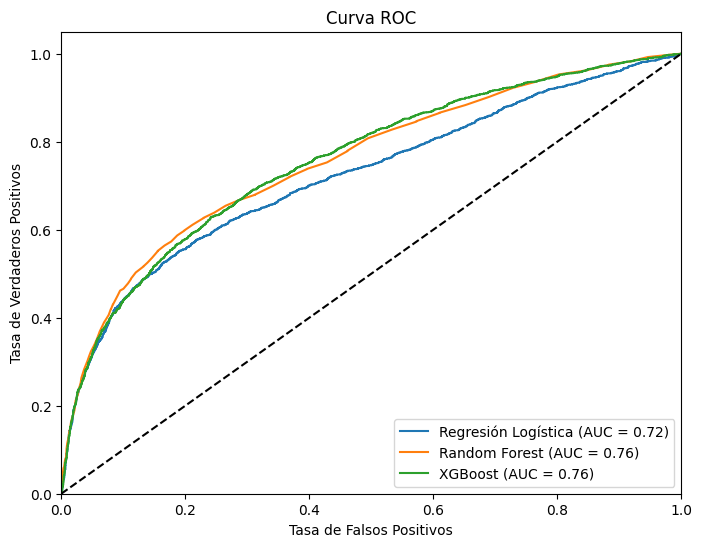

<Figure size 640x480 with 0 Axes>

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Curva ROC para Regresión Logística
model_lr = LogisticRegression()
model_lr.fit(X_train_scaled, y_train)

y_pred_lr = model_lr.predict_proba(X_test_scaled)[:, 1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_lr)
roc_auc_lr = roc_auc_score(y_test, y_pred_lr)
# Curva ROC para Random Forest
y_pred_rf = model_rf.predict_proba(X_test_scaled)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)

# Curva ROC para XGBoost
y_pred_xgb = model_xgb.predict_proba(X_test_scaled)[:, 1]
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_pred_xgb)

# Graficar las curvas ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label='Regresión Logística (AUC = {:.2f})'.format(roc_auc_lr))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = {:.2f})'.format(roc_auc_rf))
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost (AUC = {:.2f})'.format(roc_auc_xgb))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()
plt.savefig('../data/img/roc_curve.png')
